# Régressions linéaire et polynôme avec python
# Alexis Araujo

## Exercice 1

#### Réalisation d'un dataset

In [1]:
# Import des librairies
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

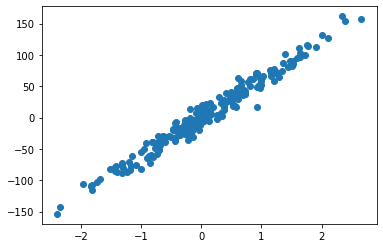

In [2]:
# Création du dataset
x, y = make_regression(n_samples=200, n_features=1, noise=10)
plt.scatter(x,y)

In [3]:
# Assurer que les dimensions de nos données sont cohérentes
print (x.shape)
print (y.shape)
y=y.reshape(y.shape[0], 1)
print(y.shape)

(200, 1)
(200,)
(200, 1)


In [4]:
# Création de la matrice dataset (2D colonne x et une colonne de 1)
X = np.hstack((x, np.ones(x.shape)))

# Initialisation des paramètres a et b de la régression linéaire (Tableau 1D de 2 éléments a et b)
theta = np.random.randn(2, 1)
theta

array([[-0.23558595],
       [-0.7762903 ]])

#### Définition du modèle

In [5]:
# Définition du modèle régression linéaire
def model(X, theta):
    return X.dot(theta)

# tester le modèle
model(X,theta)

array([[-0.60701013],
       [-0.57812351],
       [-0.44284079],
       [-0.62828525],
       [-0.49726595],
       [-0.76882156],
       [-0.72336689],
       [-0.72349556],
       [-0.67842053],
       [-0.9329585 ],
       [-0.81265554],
       [-0.31257499],
       [-0.576766  ],
       [-1.15778146],
       [-0.87201007],
       [-0.59859633],
       [-0.95968479],
       [-0.77848458],
       [-1.22616922],
       [-0.93083332],
       [-0.46774265],
       [-0.94460871],
       [-0.89959937],
       [-1.04903819],
       [-0.74811964],
       [-0.34617245],
       [-0.22360867],
       [-0.94734482],
       [-0.70636947],
       [-0.88888665],
       [-0.89367289],
       [-0.59496346],
       [-0.89902511],
       [-0.62695736],
       [-1.06123323],
       [-1.34103811],
       [-0.90884835],
       [-0.96894452],
       [-0.92670799],
       [-0.82062921],
       [-1.13713315],
       [-0.67545416],
       [-0.72380413],
       [-0.85666599],
       [-0.61145135],
       [-0

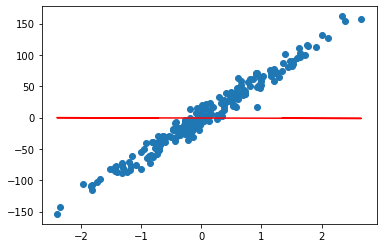

In [6]:
# Affichage de l'application du modèle sur le dataset
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [7]:
# Le modèle répond pas à nos attentes car la droite n'a pas une erreur minim

#### Fonction de coût
Pour l'évaluation des performances

In [8]:
def cout(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

#### Algorithme de descente de gradient

In [9]:
# Calcul de dérivé (gradient)
def grad(X, y, theta):
    m = len(y)
    return (1 / m) * X.T.dot(model(X, theta) - y)

# Algorithme itératif de descente de gradient
def DG(X,y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
        return theta

# Le test de DG avec notre modèle sur dataset
thetaF=DG(X,y, theta, learning_rate =0.001, n_iterations=1000)
thetaF

array([[-0.17886304],
       [-0.77232422]])

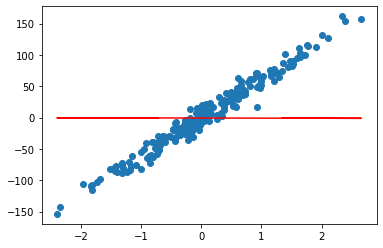

In [10]:
# Affichage de la prédiction
prediction=model(X, thetaF)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

In [11]:
# Evaluation des performances
def DG(X, y, theta, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)
    for i in range(0 , n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        histCout[i] = cout(X, y, theta)
    return theta, histCout

thetaF, histCout=DG(X,y, theta, learning_rate =0.01, n_iterations=1000)
thetaF, histCout

(array([[ 6.08975056e+01],
        [-3.47148550e-02]]),
 array([1753.15473045, 1721.57251563, 1690.57795674, 1660.16007851,
        1630.30811142, 1601.01148786, 1572.25983834, 1544.04298773,
        1516.35095163, 1489.17393275, 1462.50231743, 1436.32667215,
        1410.63774015, 1385.4264381 , 1360.68385287, 1336.40123827,
        1312.57001197, 1289.18175238, 1266.22819563, 1243.70123263,
        1221.59290612, 1199.89540787, 1178.60107581, 1157.70239134,
        1137.1919766 , 1117.06259184, 1097.30713284, 1077.9186283 ,
        1058.89023742, 1040.21524742, 1021.88707109, 1003.8992445 ,
         986.24542465,  968.9193872 ,  951.91502423,  935.2263421 ,
         918.84745923,  902.77260406,  886.99611297,  871.51242822,
         856.316096  ,  841.40176447,  826.76418184,  812.39819448,
         798.29874511,  784.46087097,  770.87970205,  757.55045933,
         744.46845313,  731.62908136,  719.02782794,  706.66026115,
         694.52203206,  682.60887297,  670.91659591,  659.44

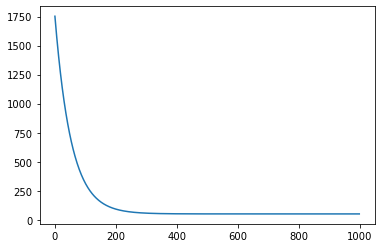

In [12]:
# Dessin de la courbe
plt.plot(range(1000),histCout)

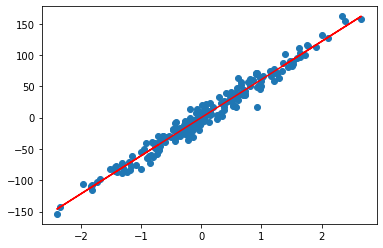

In [13]:
# Affichage de la prédiction
prediction=model(X, thetaF)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

In [14]:
# Coefficient de détermination (un coeff à 1, le modèle est meilleure)
def coefDet(y, prediction):
    u = ((y - prediction) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v
coefDet(y, prediction)

0.9717304636660163

In [15]:
# Nous pouvons voir à présent que la réduction des erreurs a été effectué

## Exercice 2

1. Définissez le tableau 2D dont la 1ère colonne représente l’âge des Brochets et la 2ème des 1’’.
Dessinez le nuage de points qui représente le taux de DDT en fonction de l’âge des Brochets.

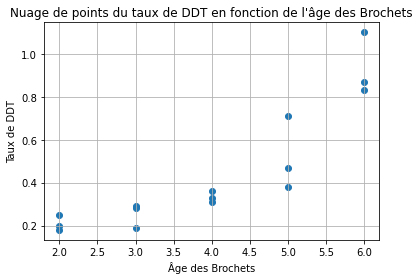

In [16]:
# Listes d'expemple à remplacer par les données du DDT.data
#ages = [2, 3, 4, 5, 6]  # Exemple : âge des brochets
#ddt_rates = [10, 15, 8, 20, 12]  # Exemple : taux de DDT correspondants

data = np.genfromtxt('DDT.data', skip_header=1)
ages = data[:, 2]
ddt_rates = data[:, 3]

ages = np.array(ages)
ddt_rates = np.array(ddt_rates)

# Création tableau 2D avec la première colonne pour l'âge et la deuxième colonne avec des "1"
X = np.column_stack((ages, np.ones(len(ages))))

# Dessin du nuage de points
plt.scatter(ages, ddt_rates)
plt.xlabel("Âge des Brochets")
plt.ylabel("Taux de DDT")
plt.title("Nuage de points du taux de DDT en fonction de l'âge des Brochets")
plt.grid(True)
plt.show()

2. Appliquez un modèle de régression linéaire à ce nuage de point.

In [17]:
print(ages.shape)
ddt_rates=ddt_rates.reshape(ddt_rates.shape[0], 1)
print(ddt_rates.shape)

(15,)
(15, 1)


In [18]:
theta=np.random.randn(2,1)
theta

array([[ 1.11126608],
       [-1.62750945]])

In [19]:
# Redéfinission de la fonction modèle pour prendre en compte les nouveaux termes
def model (X, theta):
    return X.dot(theta)
model(X, theta)

array([[0.59502271],
       [0.59502271],
       [0.59502271],
       [1.70628879],
       [1.70628879],
       [1.70628879],
       [2.81755487],
       [2.81755487],
       [2.81755487],
       [3.92882095],
       [3.92882095],
       [3.92882095],
       [5.04008703],
       [5.04008703],
       [5.04008703]])

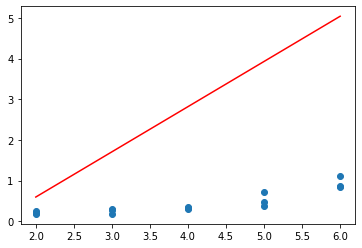

In [20]:
plt.scatter(ages,ddt_rates)
plt.plot(ages, model(X,theta), c='r')

In [21]:
def cout(X,ddt_rates,theta):
    m=len(ddt_rates)
    return 1/(2*m)*np.sum((model(X,theta)-ddt_rates)**2)

def grad(X, ddt_rates, theta):
    m=len(ddt_rates)
    return (1/m)*X.T.dot(model(X,theta)-ddt_rates)

def DG (X,ddt_rates, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,ddt_rates, theta)
        return theta

thetaF=DG(X,ddt_rates, theta, learning_rate =0.001, n_iterations=1000)
thetaF

array([[ 1.09991599],
       [-1.629877  ]])

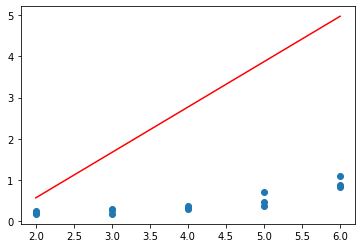

In [22]:
prediction=model(X, thetaF)
plt.scatter(ages,ddt_rates)
plt.plot(ages, prediction, c='r')

3. Quel algorithme d’apprentissage utilisez-vous pour la minimisation de la fonction de coût ?
Pour minimiser de la fonction de coût dans le cadre de la régression linéaire, l'algorithme d'apprentissage utilisé est l'algorithme de la descente de gradient.

4. Évaluez les performances de votre modèle.

In [23]:
def DG(X, ddt_rates, theta, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, ddt_rates, theta)
        histCout[i] = cout(X, ddt_rates, theta)
    return theta, histCout


thetaF, histCout = DG(X, ddt_rates, theta, learning_rate=0.01, n_iterations=1000)
thetaF, histCout

(array([[ 0.28962546],
        [-0.76451753]]),
 array([2.47797674, 1.6771069 , 1.15018903, 0.80348133, 0.57531895,
        0.42513777, 0.32625405, 0.26111482, 0.21817345, 0.18983438,
        0.17110112, 0.15868692, 0.15042968, 0.14490715, 0.14118376,
        0.13864405, 0.13688318, 0.13563483, 0.13472382, 0.13403491,
        0.13349229, 0.13304608, 0.13266349, 0.13232294, 0.13201022,
        0.13171601, 0.13143415, 0.13116061, 0.13089273, 0.13062875,
        0.13036753, 0.13010831, 0.12985059, 0.12959404, 0.12933844,
        0.12908365, 0.12882959, 0.12857617, 0.12832337, 0.12807116,
        0.12781951, 0.12756841, 0.12731787, 0.12706786, 0.12681838,
        0.12656944, 0.12632103, 0.12607315, 0.12582579, 0.12557895,
        0.12533264, 0.12508685, 0.12484158, 0.12459683, 0.1243526 ,
        0.12410888, 0.12386568, 0.123623  , 0.12338082, 0.12313917,
        0.12289802, 0.12265738, 0.12241725, 0.12217763, 0.12193852,
        0.12169991, 0.1214618 , 0.12122421, 0.12098711, 0.12075051,


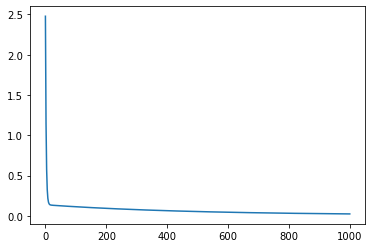

In [24]:
# Affichage de la courbe de variation de l'erreur
plt.plot(range(1000),histCout)

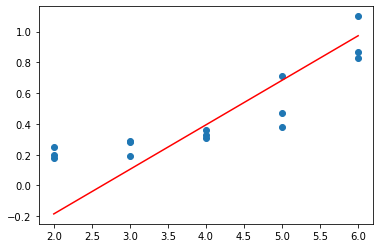

In [25]:
# Prédictions avec le modèle final
prediction=model(X, thetaF)
plt.scatter(ages,ddt_rates)
plt.plot(ages, prediction, c='r')

In [26]:
# Calcule du coefficient de détermination pour le modèle polynomiale
def coefDet(ddt_rates, prediction):
    u=((ddt_rates-prediction)**2).sum()
    v=((ddt_rates-ddt_rates.mean())**2).sum()
    return 1-(u/v)
coefDet(ddt_rates, prediction)

0.3580170822065898

5. Est-ce la régression linéaire est un bon modèle pour la prédiction de taux de DDT en fonction de l’âge des Brochets ?
Utilisez un modèle de régression polynomiale (la plus simple : polynôme de seconde degré).
Pour cela, il suffit qu’on adapte le dataset et le nombre de coefficient de régression (a, b et c). Le reste de l’algorithme reste le même.

Le coefficient est de 0,60. Cela signifie que le modèle de régression linéaire est de 60.06% de la variance dans le taux de DDT en fonction de l'âge des brochets. C'est un bon résultat cependant il reste une corrélation conséquente entre l'âge des borchets et le taux de DDT, une variance qui non expliquée. Mais le modèle n'a pas beaucoup de données donc il est pas possible d'avoir un meilleure coefficient pour la régression linéaire. Nous pouvons alors appliqué une autre méthode : la régression polynomiale

In [27]:
# Adaptation des données pour inclure l'âge au carré
ages_squared = ages ** 2
X_poly = np.column_stack((ages, ages_squared, np.ones(ages.shape)))

# Réinitialisation des coefficients du modèle pour inclure les nouveaux termes
theta_poly = np.random.randn(3, 1) * 0.01

theta_poly

array([[ 0.00516026],
       [ 0.00354302],
       [-0.00674458]])

In [28]:
# Redéfinission de la fonction modèle pour prendre en compte les nouveaux termes
def model_poly(X_poly, theta_poly):
    return X_poly.dot(theta_poly)
model_poly(X_poly, theta_poly)

array([[0.01774804],
       [0.01774804],
       [0.01774804],
       [0.04062342],
       [0.04062342],
       [0.04062342],
       [0.07058485],
       [0.07058485],
       [0.07058485],
       [0.10763232],
       [0.10763232],
       [0.10763232],
       [0.15176584],
       [0.15176584],
       [0.15176584]])

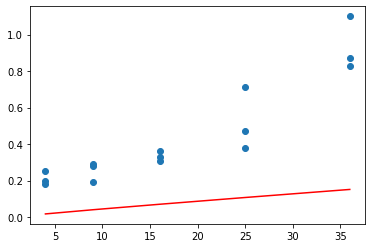

In [29]:
plt.scatter(ages_squared,ddt_rates)
plt.plot(ages_squared, model_poly(X_poly,theta_poly), c='r')

In [30]:
def cout_poly(X_poly,ddt_rates,theta_poly):
    m=len(ddt_rates)
    return 1/(2*m)*np.sum((model_poly(X_poly,theta_poly)-ddt_rates)**2)

def grad_poly(X_poly, ddt_rates, theta_poly):
    m=len(ddt_rates)
    return (1/m)*X_poly.T.dot(model_poly(X_poly,theta_poly)-ddt_rates)

def DG_poly(X_poly, ddt_rates, theta_poly, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta_poly = theta_poly - learning_rate * grad_poly(X_poly, ddt_rates, theta_poly)
        histCout[i] = cout_poly(X_poly, ddt_rates, theta_poly)
    return theta_poly, histCout

# Test de la descente de gradient pour le modèle polynomiale
theta_poly_final, histCout_poly = DG_poly(X_poly, ddt_rates, theta_poly, learning_rate=0.0001, n_iterations=1000)
theta_poly_final, histCout_poly

(array([[ 0.00945879],
        [ 0.02257615],
        [-0.00488319]]),
 array([0.08855669, 0.08098291, 0.07410806, 0.06786764, 0.0622031 ,
        0.05706131, 0.05239401, 0.04815743, 0.04431181, 0.04082108,
        0.03765248, 0.03477629, 0.03216552, 0.02979567, 0.02764453,
        0.0256919 , 0.02391946, 0.02231058, 0.02085018, 0.01952454,
        0.01832124, 0.01722898, 0.01623752, 0.01533755, 0.01452063,
        0.0137791 , 0.01310599, 0.012495  , 0.0119404 , 0.01143697,
        0.01098   , 0.0105652 , 0.01018867, 0.0098469 , 0.00953666,
        0.00925505, 0.00899942, 0.00876738, 0.00855676, 0.00836557,
        0.00819202, 0.00803449, 0.00789149, 0.00776169, 0.00764386,
        0.00753691, 0.00743982, 0.0073517 , 0.0072717 , 0.00719908,
        0.00713317, 0.00707333, 0.00701902, 0.00696972, 0.00692496,
        0.00688433, 0.00684746, 0.00681398, 0.00678359, 0.006756  ,
        0.00673096, 0.00670823, 0.00668759, 0.00666886, 0.00665185,
        0.00663641, 0.0066224 , 0.00660967, 0

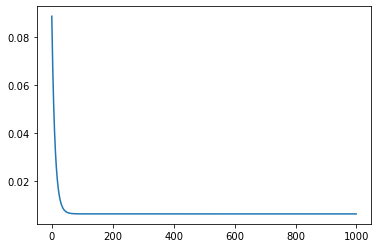

In [31]:
# Affichage de la courbe de variation de l'erreur
plt.plot(range(1000), histCout_poly)

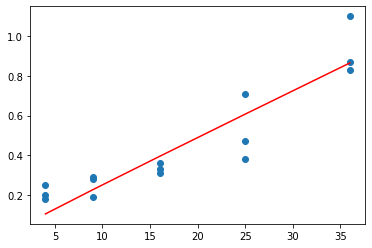

In [32]:
# Prédictions avec le modèle polynomiale final
prediction_poly = model_poly(X_poly, theta_poly_final)
plt.scatter(ages_squared,ddt_rates)
plt.plot(ages_squared, prediction_poly, c='r')

In [33]:
# Calcule du coefficient de détermination pour le modèle polynomiale
def coefDet_poly(ddt_rates, prediction_poly):
    u=((ddt_rates-prediction_poly)**2).sum()
    v=((ddt_rates-ddt_rates.mean())**2).sum()
    return 1-(u/v)
coefDet_poly(ddt_rates, prediction_poly)

0.8320590130805723

CONCLUSION SUR LE CHOIX DU MODELE : Nous avons un meilleur résultat avec la régression polynomiale. Grâce à l'adaptation du dataset et des coefficients de régression. Pour ce jeu de données il est donc préférable d'utiliser cette méthode. Il faut juste faire attention aux ajustements.

Le jeu de données joue un role crucial dans le choix du modèle. Si des données présentent une relation simple, une simple régression suiffit, cependant si la relation est complexe ou non linéaire comme dans ce cas, il est préférable d'utiliser la régression polynomiale ou d'autres modèles qui sont non linéaire. Il faut donc faire un travail en amont pour visualiser les données et l'analyse des performances du modèle.

## Exercice 3

1. Création de dataset

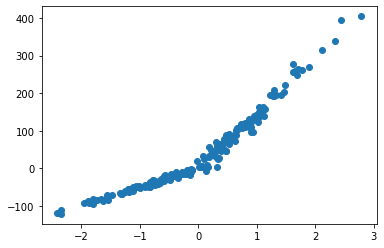

In [34]:
# Création du dataset
x, y = make_regression(n_samples=200, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x, y)

2. Création du modèle
Un modèle de régression linéaire convient-il à ce nuage de point ?
Argumentez votre réponse. Que proposez-vous comme modèle de régression ?

Le nuage de point n'est pas linéaire, de plus on a généré des données avec une fonction non-linéaire abs(y/2), donc dans ce cas la régression linéaire n'est pas le bon modèle.
Je propose donc le modèle de régression polynomiale.

In [35]:
print(x.shape)
y=y.reshape(y.shape[0], 1)
print(y.shape)

(200, 1)
(200, 1)


In [36]:
# Création de la matrice du modèle pour la régression polynomiale de degré 2
X_poly = np.hstack((x**2, x, np.ones(x.shape)))

# Ajustement du modèle de régression polynomiale
theta_poly = np.random.randn(3, 1)
theta_poly

array([[-0.62663147],
       [ 1.83906071],
       [-0.75399976]])

In [37]:
X_poly

array([[ 7.08200583e-01,  8.41546542e-01,  1.00000000e+00],
       [ 2.51789347e+00, -1.58678715e+00,  1.00000000e+00],
       [ 9.05163122e-01,  9.51400611e-01,  1.00000000e+00],
       [ 2.19816533e+00,  1.48262110e+00,  1.00000000e+00],
       [ 1.44037553e-01,  3.79522796e-01,  1.00000000e+00],
       [ 5.46371359e-01, -7.39169371e-01,  1.00000000e+00],
       [ 1.75617144e-02,  1.32520619e-01,  1.00000000e+00],
       [ 7.32139444e-02,  2.70580754e-01,  1.00000000e+00],
       [ 4.25368962e-02, -2.06244748e-01,  1.00000000e+00],
       [ 4.67079105e-02,  2.16120130e-01,  1.00000000e+00],
       [ 2.77472757e-02, -1.66575135e-01,  1.00000000e+00],
       [ 4.49231660e+00,  2.11950857e+00,  1.00000000e+00],
       [ 2.21531128e-01,  4.70670934e-01,  1.00000000e+00],
       [ 8.19175098e-01,  9.05082923e-01,  1.00000000e+00],
       [ 4.19502438e-01, -6.47690079e-01,  1.00000000e+00],
       [ 6.56242587e-02, -2.56172322e-01,  1.00000000e+00],
       [ 8.61989368e-01,  9.28433825e-01

In [38]:
# Redéfinition de la fonction modèle pour prendre en compte les nouveaux termes
def model_poly(X_poly, theta_poly):
    return X_poly.dot(theta_poly)
model_poly(X_poly, theta_poly)

array([[ 3.49874648e-01],
       [-5.24998895e+00],
       [ 4.28480023e-01],
       [ 5.95190885e-01],
       [-1.46292763e-01],
       [-2.45575060e+00],
       [-5.21291022e-01],
       [-3.02263491e-01],
       [-1.15995133e+00],
       [-3.85810370e-01],
       [-1.07772887e+00],
       [ 3.28878240e-01],
       [-2.72257169e-02],
       [ 3.97181786e-01],
       [-2.20801457e+00],
       [-1.26623844e+00],
       [ 4.13296744e-01],
       [-3.42159567e-01],
       [-1.79869320e+00],
       [-1.48354060e+00],
       [ 5.93922532e-01],
       [-3.86031415e+00],
       [-2.60464568e-02],
       [-1.54319122e-01],
       [-5.22097317e+00],
       [-3.76638441e+00],
       [-1.40472591e+00],
       [ 4.98003317e-01],
       [ 5.73975894e-01],
       [-2.39803750e-01],
       [-1.46572179e+00],
       [-2.82349271e+00],
       [ 4.66979377e-01],
       [-2.69758445e+00],
       [-4.02897824e+00],
       [-9.99262759e-01],
       [-2.47945939e+00],
       [-4.29810600e+00],
       [ 5.7

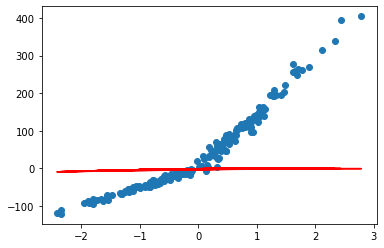

In [39]:
# Tracer le nuage de points et la courbe du modèle de régression polynomiale
plt.scatter(x, y)
plt.plot(x, model_poly(X_poly, theta_poly), c='r')
plt.show()

3. Fonction de coût et algorithme d’apprentissage
Quel algorithme d’apprentissage utilisez vous pour la minimisation de la fonction de coût (la recherche des valeurs optimales pour a,
b, et c) ?

J'utilise la descente de gradient pour minimiser la fonction de cout. Il est couramment utilisé. Et je l'ai utilisé dans les autres exercices.

In [40]:
def cout_poly(X_poly, y, theta_poly):
    m = len(y)
    return 1 / (2 * m) * np.sum((model_poly(X_poly, theta_poly) - y)**2)


def grad_poly(X_poly, y, theta_poly):
    m = len(y)
    return (1 / m) * np.dot(X_poly.T,model_poly(X_poly, theta_poly) - y)

4. Evaluation des performances

In [41]:
def DG_poly(X_poly, y, theta_poly, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta_poly = theta_poly - learning_rate * grad_poly(X_poly, y, theta_poly)
        histCout[i] = cout_poly(X_poly, y, theta_poly)
    return theta_poly, histCout

# Test de la descente de gradient pour le modèle polynomiale
theta_poly_final, histCout_poly = DG_poly(X_poly, y, theta_poly, learning_rate=0.01, n_iterations=1000)
theta_poly_final, histCout_poly

(array([[21.77522785],
        [97.81213412],
        [17.44864518]]),
 array([5581.58116259, 5430.40944006, 5284.89807471, 5144.77286703,
        5009.77480675, 4879.65918632, 4754.19476697, 4633.16299445,
        4516.35726119, 4403.58221235, 4294.65309303, 4189.39513416,
        4087.64297478, 3989.24011862, 3894.03842279, 3801.89761675,
        3712.68484976, 3626.27426505, 3542.54659918, 3461.38880504,
        3382.6936971 , 3306.35961762, 3232.29012242, 3160.39368532,
        3090.58341982, 3022.77681725, 2956.89550023, 2892.86499067,
        2830.61449131, 2770.07668013, 2711.18751674, 2653.88606012,
        2598.11429697, 2543.81698018, 2490.94147656, 2439.43762359,
        2389.25759438, 2340.35577056, 2292.68862248, 2246.2145964 ,
        2200.89400815, 2156.688943  , 2113.56316124, 2071.4820092 ,
        2030.41233549, 1990.32241185, 1951.18185874, 1912.96157503,
        1875.63367178, 1839.17140979, 1803.54914063, 1768.74225109,
        1734.72711078, 1701.48102256, 1668.98

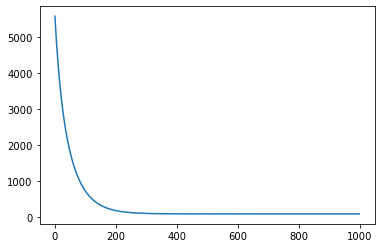

In [42]:
# Affichage de la courbe de variation de l'erreur
plt.plot(range(1000), histCout_poly)

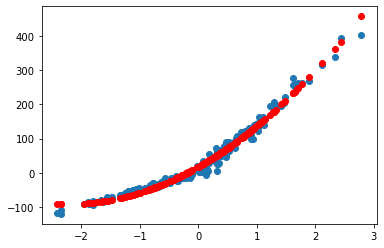

In [43]:
# Prédictions avec le modèle polynomiale final
prediction_poly = model_poly(X_poly, theta_poly_final)
plt.scatter(x,y)
plt.scatter(x, prediction_poly, c='r')

In [44]:
# Calcule du coefficient de détermination pour le modèle polynomiale
def coefDet_poly(y, prediction_poly):
    u = ((y - prediction_poly)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u / v)
coefDet_poly(y, prediction_poly)

0.9818324246838557